Link: [Dashboard Tableau](https://public.tableau.com/app/profile/gusti.agung5677/viz/VideoGameSalesMilestone1/Dashboard1)

# I. Introduction

Name: I Gusti Agung Agastya Tarumawijaya <br/>

# II. Problem Identification

### The Problem

- An international game store wants to increase sales next year by focusing on the product segments most favored by consumers. As a data analyst, I have been asked to investigate this and provide recommendations on which product segment is the most profitable for the store.

### SMART Analysis

- **Specific**: 
  - Increasing profit from sales in the next year.

- **Measurable**: 
  - Grow 10% of total revenue compared to the previous year.
  - Increase customer retention rate to 70%. 

- **Achieveable**:
  - Optimize inventory by focusing on best-selling game genres.
  - Offer bundles, discounts, and pre-order incentives to increase purchase volume.

- **Relevant**
  - Higher sales will increase profit margins and market share.
  - The store must adapt to changing consumer preferences.

- **Time-Based**
  - Q1 and Q2 (Jan -Jun): Launch targeted marketing campaigns for pre-orders.
  - Q3 and Q4 (Jul - Dec): Review annual performance and adjust for next year.

Increase profit by 10% by analyzing sales data for each platform, publisher, released year and game genre while ensuring measurable progress over the next year. 

### Problem Statement

1. Which platform has the highest average sales? Is there any outstanding game sales for that platform?

2. Is game genre independent to platform (e.g., do RPGs sell more on PlayStation 4 vs. Xbox)?

3. Which regions contribute the most to global video game sales?

4. How do sales trends in North America, Europe, Japan, and globally affected by game's genre?

5. How is the global sales trend each year for the top 5 publishers?

6. Which game genre was most frequently released by the top-selling publishers? How do the sales in North America, Europe, and Japan?

# III. Data Loading

In [679]:
import pandas as pd

# read csv file containing the data
df_vg_sales = pd.read_csv('vg_sales.csv')

# IV. Data Cleaning

In [680]:
df_vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<center>

| Column | Description | Prefered Data Type |
|--------|-------------|--------------------|
|`Rank`|The ranking of the game based on total global sales|`Integer`|
|`Name`|The title of the video game|`String`|
|`Platform`|The console or platform the game was released on|`String`|
|`Year`|The year the game was released|`Float`|
|`Genre`|The genre of the game|`String`|
|`Publisher`|The company that published the game|`String`|
|`NA_Sales`|Sales of the game in North America (NA), measured in millions USD|`Float`|
|`EU_Sales`|Sales of the game in Europe (EU), measured in millions USD|`Float`|
|`JP_Sales`|Sales of the game in Japan (JP), measured in millions USD|`Float`|
|`Other_Sales`|Sales of the game in regions outside of North America, Europe, and Japan, measured in millions USD|`Float`|
|`Global_Sales`|The total global sales of the game, calculated as the sum of NA_Sales, EU_Sales, JP_Sales, and Other_Sales, measured in millions USD|`Float`|

</center>

First of all, from the cell above, we can see that there are some missing values in the `Year` and `Publisher` columns.

In [681]:
for column in df_vg_sales.columns:
  total_row = df_vg_sales.shape[0]
  missing_value_count = df_vg_sales[df_vg_sales[column].isna()].shape[0]
  print(f'Missing value at column {column.lower()}: {missing_value_count} ({round((missing_value_count/total_row)*100, 2)}%)')

Missing value at column rank: 0 (0.0%)
Missing value at column name: 0 (0.0%)
Missing value at column platform: 0 (0.0%)
Missing value at column year: 271 (1.63%)
Missing value at column genre: 0 (0.0%)
Missing value at column publisher: 58 (0.35%)
Missing value at column na_sales: 0 (0.0%)
Missing value at column eu_sales: 0 (0.0%)
Missing value at column jp_sales: 0 (0.0%)
Missing value at column other_sales: 0 (0.0%)
Missing value at column global_sales: 0 (0.0%)


Let's see what happened to the `Year` column where its value is NaN

In [682]:
df_vg_sales[df_vg_sales['Year'].isna()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


Let's see what happened to the `Publisher` column where its value is NaN

In [683]:
df_vg_sales[df_vg_sales['Publisher'].isna()].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


The missing `Years` and `Publisher` might be due to errors during data entry, scraping, or merging different datasets.

Since we cannot identify a pattern for why the data is missing from the sample above, we assume that a technical error occurred during the dataset creation.

And the missing values in the `Year` and `Publisher` columns are relatively small, accounting for less than 2% of the total data.

In this case, I will not delete records with missing values because other relevant columns for our analysis, such as `Name` and `Sales`, contain valid data.

Check central of tendencies column `Year`, to see the distribution

In [684]:
print(f'Mean: {df_vg_sales['Year'].mean()}')
print(f'Median: {df_vg_sales['Year'].median()}')

Mean: 2006.4064433147546
Median: 2007.0


Next, we will fill the missing values with:  

- Missing values in the `Year` column = **mean of the `Year` column grouped by its Platform**  
- Missing values in the `Publisher` column = **`_unknown_publisher`**  

Here, we fill the missing values in the `Year` column with its mean grouped by its Platform to avoid disrupting the distribution.

In [685]:
import math

# group all the Platform and get the average of the year
df_mean_of_year_per_platform = df_vg_sales[['Platform','Year']].groupby('Platform').agg({'Year': 'mean'})

# set the missing value in year column into its mean grouped by its platform
def find_mean_by_platform(row):
  if type(row['Year']) == 'float':
    return row['Year']
  else:
    return math.floor(df_mean_of_year_per_platform.loc[row['Platform']]['Year'])
  
df_vg_sales['Year'] = df_vg_sales.apply(find_mean_by_platform, axis=1)

# set thi missing value in publisher into _unknown_publisher
df_vg_sales['Publisher'] = df_vg_sales['Publisher'].fillna(value='_unknown_publisher')

df_vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [686]:
# save cleaned data into csv
df_vg_sales.to_csv('vg_sales_clean.csv', index=False)

# V. Analysis

### Which platform has the highest average sales?

In [687]:
# get the average sales per platform 
df_vg_sales[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].groupby(by='Platform').agg({'NA_Sales': 'mean', 'EU_Sales': 'mean', 'JP_Sales': 'mean', 'Global_Sales': 'mean'}).sort_values(by='Global_Sales', ascending=False).head()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Platform,,,,
GB,1.166531,0.487959,0.868571,2.606633
NES,1.285102,0.215816,1.006633,2.561939
GEN,0.713704,0.204444,0.098889,1.050370
SNES,0.256192,0.079665,0.487657,0.837029
PS4,0.288095,0.368155,0.042560,0.827679


Here are the top 5 platforms with the highest average sales. In first place is the **Game Boy**, with an average game sales total of 2.6 million USD. This means that every new game that can be played in **Game Boy** has higher possibility to sell more than other platform.

Next I will show you the distribution of global sales data for games on the top-ranking platform in average sales

In [688]:
# get the std deviation and skewness of global sales for Game Boy
df_vg_sales_GB = df_vg_sales[df_vg_sales['Platform'] == 'GB']

std = df_vg_sales_GB['Global_Sales'].std()
print(f'Standard deviation of total sales: {std}')
print(f"Skewness: {df_vg_sales_GB['Global_Sales'].skew()}")

Standard deviation of total sales: 5.36528704161509
Skewness: 4.037054650233186


Most games have relatively **low sales**, but a few games have **very high sales**

Let's checkout the outliers.

In [689]:
q1 = df_vg_sales_GB['Global_Sales'].quantile(0.25)
q3 = df_vg_sales_GB['Global_Sales'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 4.96
Lower Boundary: -2.49


In [690]:
outlier = df_vg_sales_GB[['Name', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']][(df_vg_sales_GB['Global_Sales']<low_bound) | (df_vg_sales_GB['Global_Sales']>up_bound)]
outlier

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,31.37
5,Tetris,Puzzle,23.20,2.26,4.22,30.26
12,Pokemon Gold/Pokemon Silver,Role-Playing,9.00,6.18,7.20,23.10
21,Super Mario Land,Platform,10.83,2.71,4.18,18.14
30,Pokémon Yellow: Special Pikachu Edition,Role-Playing,5.89,5.04,3.12,14.64
50,Super Mario Land 2: 6 Golden Coins,Adventure,6.16,2.04,2.69,11.18
132,Pokémon Crystal Version,Role-Playing,2.55,1.56,1.29,6.39
170,Dr. Mario,Puzzle,2.18,0.96,2.00,5.34
171,Pokemon Pinball,Misc,3.02,1.12,1.01,5.31
184,Super Mario Land 3: Wario Land,Platform,2.49,0.98,1.57,5.19


Here, we can see the outliers (the highest-selling games) for the **Game Boy** platform. Most of them are `Role-Playing` games and `Platform` games.

### Is game genre independent of platform?

To test the relationship between categorical variables and determine if they are dependent on each other, I will use the **Chi-Square Test**. 

  - **H0**: Game genre is independent of platform.
  - **H1**: Game genre is dependent on platform.

In [691]:
contingency_table = pd.crosstab(df_vg_sales['Genre'], df_vg_sales['Platform'])
contingency_table

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,0,182,3,343,6,167,101,3,0,...,3,0,12,0,0,238,63,324,155,68
Adventure,2,1,37,11,240,5,38,20,2,0,...,26,0,4,1,0,84,3,47,26,12
Fighting,2,0,14,12,36,0,23,42,5,0,...,31,0,25,0,0,42,5,65,48,7
Misc,5,0,53,0,393,8,110,36,1,0,...,15,2,17,0,0,280,21,126,46,15
Platform,9,0,28,2,92,19,142,73,7,1,...,5,1,26,0,0,58,16,24,49,4
Puzzle,11,1,20,0,238,15,41,13,0,0,...,5,0,13,0,0,55,4,7,7,0
Racing,6,0,11,6,67,2,64,63,1,0,...,8,1,9,0,0,94,3,105,123,19
Role-Playing,0,0,86,4,200,21,73,27,3,0,...,17,1,50,0,4,35,6,76,23,13
Shooter,24,0,7,3,42,1,40,48,1,0,...,22,0,10,1,0,66,10,203,132,33


In [692]:
from scipy import stats

res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


p-value < 0.05 means we reject **H0** that leads to Game genre and platform are dependent, and Some game genres are significantly more common on certain platforms.



### Which regions contribute the most to global video game sales?

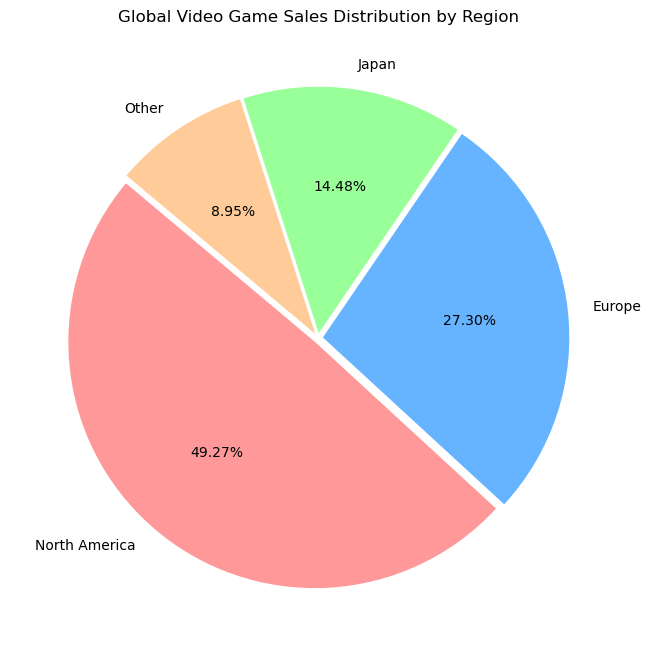

In [693]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_by_region = df_vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

labels = ['North America', 'Europe', 'Japan', 'Other']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(8,8))
sales_by_region.plot(kind='pie', autopct='%.2f%%', labels=labels, colors=colors, startangle=140, explode=(0.02,0.02,0.02,0.02))
plt.title('Global Video Game Sales Distribution by Region')
plt.show()

sales_by_region.reset_index().rename(columns={'index':'Region', 0:'Total Sales'}).to_csv('sales_by_region.csv', index=False)

From the pie chart above, we can see that the **North America** generates the highest sales compared to Europe, Japan, and other regions, contributing nearly half of the total global sales.

### How do sales trends in North America, Europe, and Japan affected by game's genre?

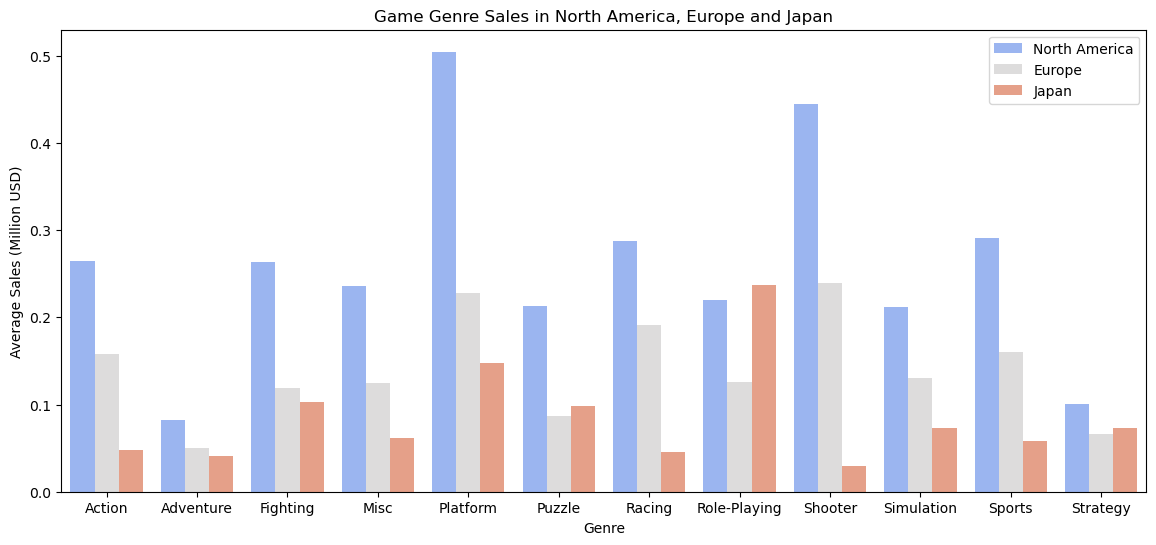

In [694]:
sales_by_genre = df_vg_sales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']].groupby(by='Genre').agg({'NA_Sales':'mean','EU_Sales':'mean','JP_Sales':'mean'}).reset_index()

list_reform_sales_by_genre = []
for index, row in sales_by_genre.iterrows():
  list_reform_sales_by_genre.append({
    'Genre': row['Genre'],
    'Region': 'North America',
    'Avg_Sales': row['NA_Sales']
  })
  list_reform_sales_by_genre.append({
    'Genre': row['Genre'],
    'Region': 'Europe',
    'Avg_Sales': row['EU_Sales']
  })
  list_reform_sales_by_genre.append({
    'Genre': row['Genre'],
    'Region': 'Japan',
    'Avg_Sales': row['JP_Sales']
  })

df_reform_sales_by_genre = pd.DataFrame(list_reform_sales_by_genre)

plt.figure(figsize=(14,6))
sns.barplot(data=df_reform_sales_by_genre, x='Genre', y='Avg_Sales', orient='v', hue='Region', palette='coolwarm')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Genre')
plt.ylabel('Average Sales (Million USD)')
plt.title('Game Genre Sales in North America, Europe and Japan')
plt.show()

From the graph above, it can be seen that sales in the **North America** region dominate compared to the European and Japanese markets, with the most popular genres being **Platform and Shooter**.

Likewise, in the **European** market, the most popular genres are **Platform and Shooter** games.

Meanwhile, the **Japanese** market tends to prefer **Role-playing** games.

### How is the global sales trend each year for the top 5 publishers?

In [695]:
# get top 5 publishers by sales
top_five_publisher = df_vg_sales[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].groupby(['Publisher']).agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Global_Sales':'sum'}).sort_values(['Global_Sales'],ascending=False).head(5)
top_five_publisher

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Publisher,,,,
Nintendo,816.87,418.74,455.42,1786.56
Electronic Arts,595.07,371.27,14.04,1110.32
Activision,429.70,215.53,6.54,727.46
Sony Computer Entertainment,265.22,187.72,74.10,607.50
Ubisoft,253.43,163.32,7.50,474.72


In [696]:
# sum all the sales by a publisher in each year
df_top_five_publisher = df_vg_sales[df_vg_sales['Publisher'].isin(top_five_publisher.index)]
df_top_five_publisher = df_top_five_publisher[['Year', 'Publisher', 'Global_Sales']].groupby(['Year', 'Publisher']).agg({'Global_Sales':'sum'})
df_top_five_publisher

Global_Sales
Year Publisher                                
1982 Activision                          19.42
1987 Nintendo                           183.97
1993 Nintendo                            96.84
1995 Activision                           1.33
     Electronic Arts                      1.73
     Nintendo                           230.09
     Ubisoft                              0.12
1996 Electronic Arts                      0.08
1998 Activision                          36.63
     Electronic Arts                    103.81
     Nintendo                           129.95
     Sony Computer Entertainment        193.73
     Ubisoft                             10.82
1999 Activision                           0.10
     Ubisoft                              0.20
2003 Activision                          61.44
     Electronic Arts                    100.60
     Nintendo                           191.15
     Ubisoft                             37.60
2004 Activision                          85.59
     Electronic Arts                    255.79
     Sony Computer Entertainment        172.80
     Ubisoft                             33.95
2008 Activision                         163.06
     Electronic Arts                    205.99
     Nintendo                           740.21
     Sony Computer Entertainment         54.09
     Ubisoft                            176.59
2009 Activision                         159.02
     Electronic Arts                    181.04
     Ubisoft                             81.59
2010 Activision                         126.39
     Electronic Arts                    168.71
     Sony Computer Entertainment        145.98
     Ubisoft                             70.82
2013 Activision                           8.81
     Electronic Arts                      4.00
     Nintendo                           214.35
     Ubisoft                             10.09
2014 Activision                          25.41
     Electronic Arts                     33.25
     Sony Computer Entertainment         10.19
     Ubisoft                             21.28
2015 Activision                          40.26
     Electronic Arts                     55.32
     Sony Computer Entertainment         30.71
     Ubisoft                             31.66

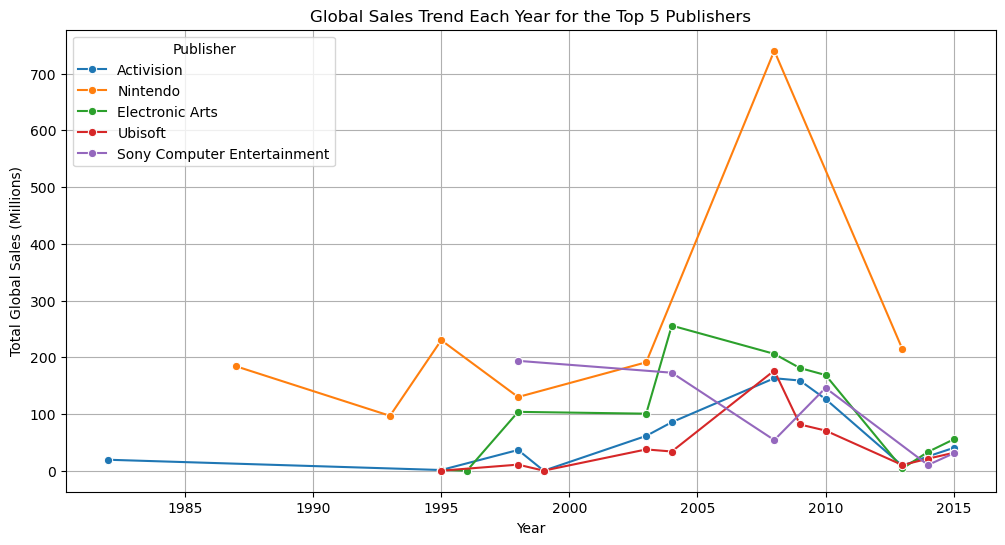

In [703]:
df_top_five_publisher = df_top_five_publisher.reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_top_five_publisher, x='Year', y='Global_Sales', hue='Publisher', marker='o', palette='tab10')

plt.title('Global Sales Trend Each Year for the Top 5 Publishers')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (Millions)')
plt.legend(title='Publisher')
plt.grid(True)
plt.show()

df_top_five_publisher.to_csv('top_five_publisher.csv', index=False)

Based on the line chart above, there was a general upward trend in sales in the early 2000s, peaking between 2006 and 2010 for the top 5 publishers. Overall, it can be seen that **Nintendo** had the highest sales in most of these years.

### Which game genre was most frequently released by the top-selling publishers?

In [698]:
# get top publisher
df_vg_sales.groupby('Publisher')[[ 'Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False)

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
...,...
Media Entertainment,0.01
New World Computing,0.01
EON Digital Entertainment,0.01


As we know, the top-selling publisher is **Nintendo**; therefore, we will filter the dataframe for Nintendo as the publisher.

In [699]:
# get all game data only if publisher is nintendo
df_vg_sales_nintendo = df_vg_sales[df_vg_sales['Publisher'] == 'Nintendo']
df_vg_sales_nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2008,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1987,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2008,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1995,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [700]:
# Count all games published by nintendo and grouped by its genre
df_vg_sales_nintendo_genre_count = df_vg_sales_nintendo.groupby('Genre')[['Genre']].count().rename(columns={'Genre': 'Count'}).reset_index().sort_values(by='Count', ascending=False)
df_vg_sales_nintendo_genre_count.head()

,Genre,Count
4,Platform,112
7,Role-Playing,106
3,Misc,100
0,Action,79
5,Puzzle,74


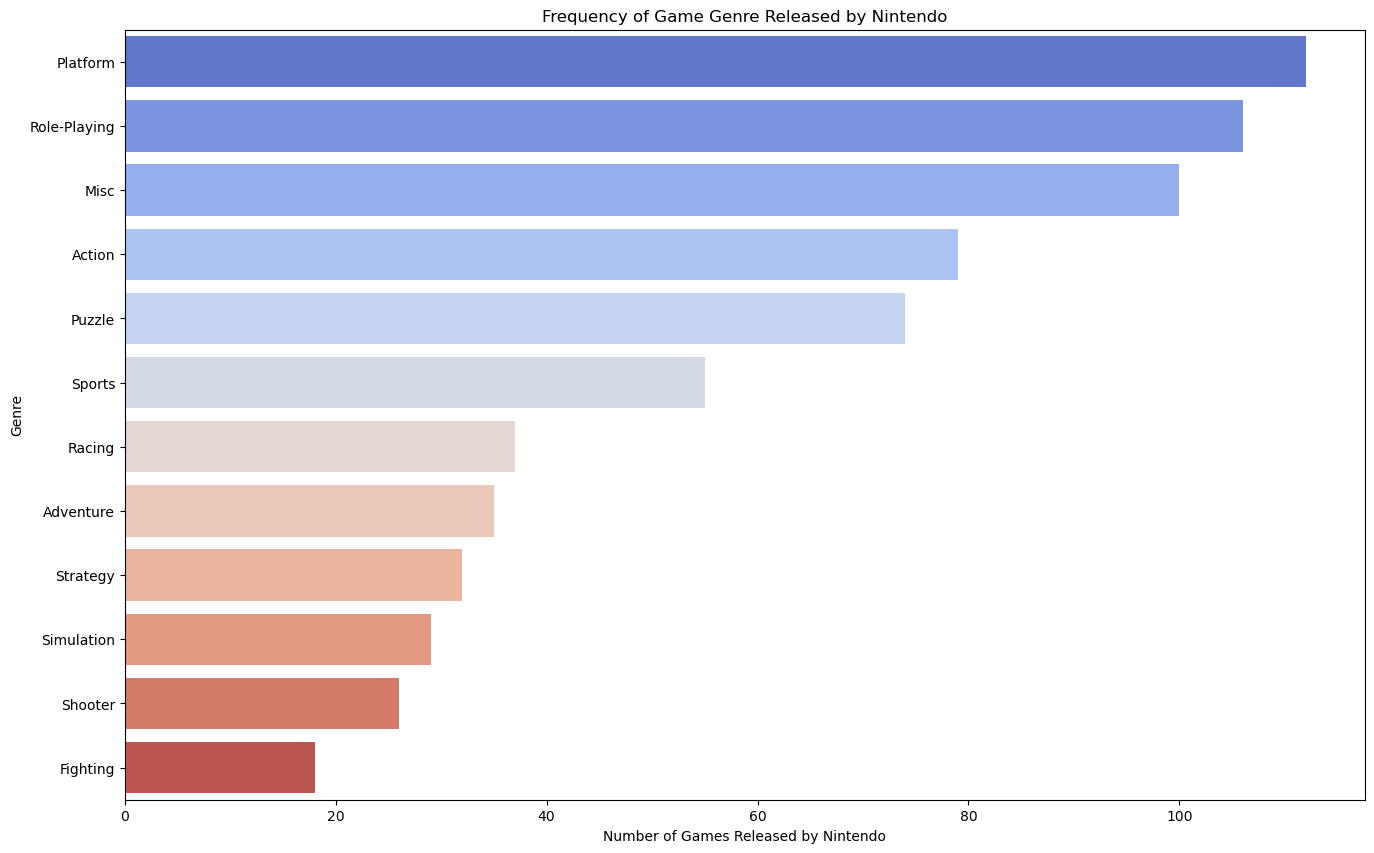

In [701]:
plt.figure(figsize=(16,10))
sns.barplot(data=df_vg_sales_nintendo_genre_count, x='Count', y='Genre', hue='Genre', palette='coolwarm')
plt.title('Frequency of Game Genre Released by Nintendo')
plt.xlabel('Number of Games Released by Nintendo')
plt.ylabel('Genre')
plt.show()

Looking at the bar chart above for Nintendo, the most frequently released game genres are **Role-playing** and **Platform games**.

# VI. Conclusion

Based on the analysis of game sales data, the following insights were obtained:

  - The **Game Boy** platform is the best-selling gaming platform, dominated by the **Pokémon** and **Super Mario** franchises. Therefore, it can be concluded that focusing the promotional budget and campaigns on this platform would be more profitable. Additionally, **Game Boy** games should be placed in highly visible areas on store displays to attract customers.

  - The **game platform** and **genre** are correlated, influenced by consumer behavior in gaming. For example, role-playing games are typically played for long hours each day, leading consumers to prefer platforms that offer comfort for extended gameplay sessions.

  - On a global scale, the **North American** market has the highest sales compared to other regions. The most popular games in North America are **Platform and Shooter** games, similar to the European market. Meanwhile, the Japanese market prefers **Role-playing** games.

  - The top-selling publisher is **Nintendo**, with its leading genres being **Platform and Role-playing** games.

**Sugestion**

  - Popular games like Pokémon and Super Mario should be placed in highly visible areas for customers.

  - Collaborate on marketing efforts with gaming platforms that have the highest game sales, such as Game Boy.

  - Create discounted bundling offers that include popular games to boost the sales of popular titles. Recommended example: a Role-playing game bundle containing five games.